#  Figure 1 (and Supplementary Figures S3-S8)

(_Adapted from IBS_classes_2sexes_7drift_Fig1_100N_v2.ipynb_)

The code below can be used to produce the results for main __Figure 1__ and __Supplementary Figures S3-S8__.

The simulation results this code uses can be found in `RESULTS_FIG1/` (results for Figure S6 are different and stored separately in `RESULTS_FIG1/FIGURE_S6/`), which have been produced using the script `SCRIPTS/script_fig1.py`.

Refer to the scripts above for a detailed description on how the results were generation, and the content of each field in the output tables.

In [1]:
# import relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# generally-used functions

# load the data
def load_data (VA, E2Ns, oi, rfm, simtype=''):
    q = round((1-rfm),3)
    #dopt = {'s': 0.15, 'm': 0.25, 'l': 0.5}
    dopt = {'s': 6.70820, 'm': 11.18034, 'l': 22.36068}
    d = 'RESULTS_FIG1/'
    if isinstance(oi, str): # The large shift sizes in Fig1A (and FigS3A)
        file = pd.read_csv(d+'simtypes_1000N_100Ngen_%iVA_%iE2Ns_20reps_%.3frfm_%.3foF_%.3foM_WFHW_v1.csv'%(VA, E2Ns, rfm, dopt[oi], -dopt[oi]))
    else:
        if VA==4: # In Fig1D (and FigS3D)
            Ngen = 500
            #d = '../CLUSTER/ANA1_24_100N/RESULTS_ANA4/'
            file1 = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_500reps_%.3frfm_%.3foF_%.3foM_%s_v1.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype))
            file2 = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_500reps_%.3frfm_%.3foF_%.3foM_%s_v2.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype))
            file3 = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_500reps_%.3frfm_%.3foF_%.3foM_%s_v3.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype))
            file4 = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_500reps_%.3frfm_%.3foF_%.3foM_%s_v4.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype))
            file = pd.concat([file1,file2,file3,file4])
        elif VA==9: # In FigS5
            if rfm==1:
                Ngen = 100
                #d = '../CLUSTER/ANA1_24_100N/RESULTS_ANA5_rfm1_fb0/'
                file1 = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_1000reps_%.3frfm_%.3foF_%.3foM_%s_v1.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype))
                file2 = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_1000reps_%.3frfm_%.3foF_%.3foM_%s_v2.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype))
                file = pd.concat([file1,file2])    
            else: # In Fig1A-C (and FigS3A)
                if E2Ns==16 and rfm>=0.8: Ngen = 500
                else: Ngen = 100
                #d = '../CLUSTER/ANA1_24_100N/RESULTS_ANA5/'
                file1 = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_1000reps_%.3frfm_%.3foF_%.3foM_%s_v1.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype))
                file2 = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_1000reps_%.3frfm_%.3foF_%.3foM_%s_v2.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype))
                file = pd.concat([file1,file2])

    return file

# function to get aesthetics for each set of parameters
def get_aesthetics (VA, E2Ns):
    if VA==4: c = 'black'; a=0.3
    elif VA==9: c = 'black'; a=1
    if E2Ns==1: ls = 'solid'; m = c
    elif E2Ns==16: ls = 'dashed'; m = 'white'
    return c, ls, m, a

# function to calculate the confidence interval for the variance using the chi-squared distribution
def chi2_confint (var, std=0):
    S = np.var(var, ddof=1)
    n_1 = len(var) - 1
    a = stats.chi2.ppf(0.025,n_1)
    b = stats.chi2.ppf(0.975,n_1)
    minn = n_1*S/b
    maxx = n_1*S/a
    if std==1: S=np.sqrt(S); minn=np.sqrt(minn); maxx=np.sqrt(maxx)
    return S, minn, maxx

# function to get the estimate and lower and upper bounds of the 95% confidence interval for various quantities
def get_confint (what, VA, E2Ns, oi, rfms='', simtype=''):
    if rfms=='': rfms = np.arange(0,1,0.05)
    #create empty df
    df = pd.DataFrame (columns=['q', 'rfm','S', 'minn', 'maxx'])
    # calculate estimate and CI for each rfm
    for rfm in rfms:
        data = load_data(VA, E2Ns, oi, rfm, simtype)
        if what=='ESD':
            a = data.meanF-data.meanM
            res = np.array([np.mean(a), np.mean(a)-1.96*np.std(a)/np.sqrt(len(a)), np.mean(a)+1.96*np.std(a)/np.sqrt(len(a))])
        elif what=='EabsSD_Vt': 
            a = np.abs(data.meanF-data.meanM)/np.sqrt(data.varT)
            res = np.array([np.mean(a), np.mean(a)-1.96*np.std(a)/np.sqrt(len(a)), np.mean(a)+1.96*np.std(a)/np.sqrt(len(a))])
        elif what=='EabsSD_Vstar': 
            a = np.abs(data.meanF-data.meanM)
            res = (1/np.sqrt(VA))*np.array([np.mean(a), np.mean(a)-1.96*np.std(a)/np.sqrt(len(a)), np.mean(a)+1.96*np.std(a)/np.sqrt(len(a))])
        elif what=='ESD_Vstar': 
            a = data.meanF-data.meanM
            res = (1/np.sqrt(VA))*np.array([np.mean(a), np.mean(a)-1.96*np.std(a)/np.sqrt(len(a)), np.mean(a)+1.96*np.std(a)/np.sqrt(len(a))])
        elif what=='VSD_V': 
            res = (1/VA)*np.array(chi2_confint(data.meanF-data.meanM)) # where 0.5=1/sqrt(VA)
        elif what=='EabsSD': 
            a = np.abs(data.meanF-data.meanM)
            res = np.array([np.mean(a), np.mean(a)-1.96*np.std(a)/np.sqrt(len(a)), np.mean(a)+1.96*np.std(a)/np.sqrt(len(a))])
        elif what=='stdSD':
            res = np.sqrt(2/np.pi)*np.array(chi2_confint(data.meanF-data.meanM, 1))
        # append results to df
        l = [(1-rfm)/(1+rfm), rfm]+ list(res)
        df.loc[len(df)] = l
    df['SE_min'] = df.S-df.minn
    df['SE_max'] = df.maxx-df.S
    return df

# function to plot the confidence intervals
def plot_confint (what, VA, E2Ns, oi, rfm_q, ax, col, ls, m, a=1, label='', fmt='o', removerfm1=1, simtype='', rfms='', xs=''):
    df = get_confint (what, VA, E2Ns, oi, rfms=rfms, simtype=simtype)
    if removerfm1==1:
        df = df[df.rfm<1]
    if xs == '':
        ax.errorbar(df[rfm_q], df.S, yerr = [np.array(df.SE_min),np.array(df.SE_max)], fmt=fmt, c=col, ls=ls, mfc=m, alpha=a, markersize=10, lw=2, label=label)
    else:
        ax.errorbar(xs, df.S, yerr = [np.array(df.SE_min),np.array(df.SE_max)], fmt=fmt, c=col, ls=ls, mfc=m, alpha=a, markersize=10, lw=2, label=label)

## Figure 1

In [3]:
def plot_figa (oi, var, ax, E2Ns=1, simtype='', removerfm1=1):
    rfm_q = 'rfm'
    dopt = {'s': 0.15, 'm': 0.25, 'l': 0.5}
    VA=9; 
    if oi=='s': c='darkblue' #c = 'tab:orange'
    elif oi=='m': c='steelblue' #c = 'tab:green'
    elif oi=='l': c='skyblue' #c = 'darkblue'
    elif oi==0: c='black' #c='darkred'
    elif oi==2: c = 'khaki'; lab = '4'
    elif oi==1.5: c = 'darkkhaki'; lab = '3'
    elif oi==1: c = 'olive'; lab = '2'
    elif oi==0.5: c = 'lightcoral'; lab = '1'
    elif oi==0.25: c = 'rosybrown'; lab = '0.5'
    elif oi==0.125: c = 'darkred'; lab = '0.25'
    if E2Ns==1: ls = 'solid'; m = c
    elif E2Ns==16: ls = 'dashed'; m = 'white'; 
    if var=='ESD': fmt='x'
    elif var=='EabsSD': fmt='o'
    if isinstance(oi, str):
        lab = '%.0f'%(2*dopt[oi]*np.sqrt(2000))
        ax.axhline(y=2*dopt[oi]*np.sqrt(2000), c=c, ls='--', label=lab) #Vs=2N=2000
        #ax.axhline(y=2*dopt[oi]*np.sqrt(2000), c=c, lw=5, ls='solid', label=lab)
    else:
        lab = oi*2
        ax.axhline(y=2*oi, c=c, ls='--', label=lab)
        #ax.axhline(y=2*oi, c=c, ls='solid', lw=5, label=lab)
    
    plot_confint (var, VA, E2Ns, oi, rfm_q, ax, c, ls, m, label=lab, removerfm1=removerfm1, simtype=simtype, fmt=fmt)
        
    ax.set_xlabel(r'$r_{fm}$', fontsize=25)
    ax.tick_params(axis='both', labelsize=15)
    ax.set_xlim(-0.05,1.05)

def plot_fig1b (var, E2Ns, VA, ax, lab='', simtype='', rfms='', removerfm1=0):
    rfm_q = 'rfm'
    col, ls, m, a = get_aesthetics (VA, E2Ns)
    
    #plot_confint ('EabsSD1', VA, E2Ns, 0, rfm_q, ax2, col, ls, m)
    if var=='ESD': 
        plot_confint ('ESD_Vstar', VA, E2Ns, 0, rfm_q, ax, col, ls, m, label=lab, a=a, simtype=simtype, rfms=rfms, removerfm1=removerfm1)
        tit1 = r'$E[SD_{\pm}]\;/\;\sqrt{V_{A,*}}$'
    elif var=='EabsSD': 
        plot_confint ('EabsSD_Vstar', VA, E2Ns, 0, rfm_q, ax, col, ls, m, label=lab, a=a, simtype=simtype, rfms=rfms, removerfm1=removerfm1) #EabsSD_Vstar
        tit1 = r'$E[SD]\;/\;\sqrt{V_{A,*}}$'

    #ax2.set_ylabel(tit1, fontsize=25)
    #ax3.set_ylabel(r'$V[SD]\;/\;V_{A,*}$', fontsize=25)
    ax.set_xlabel(r'$r_{fm}$', fontsize=25)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlim(-0.05,1.05)

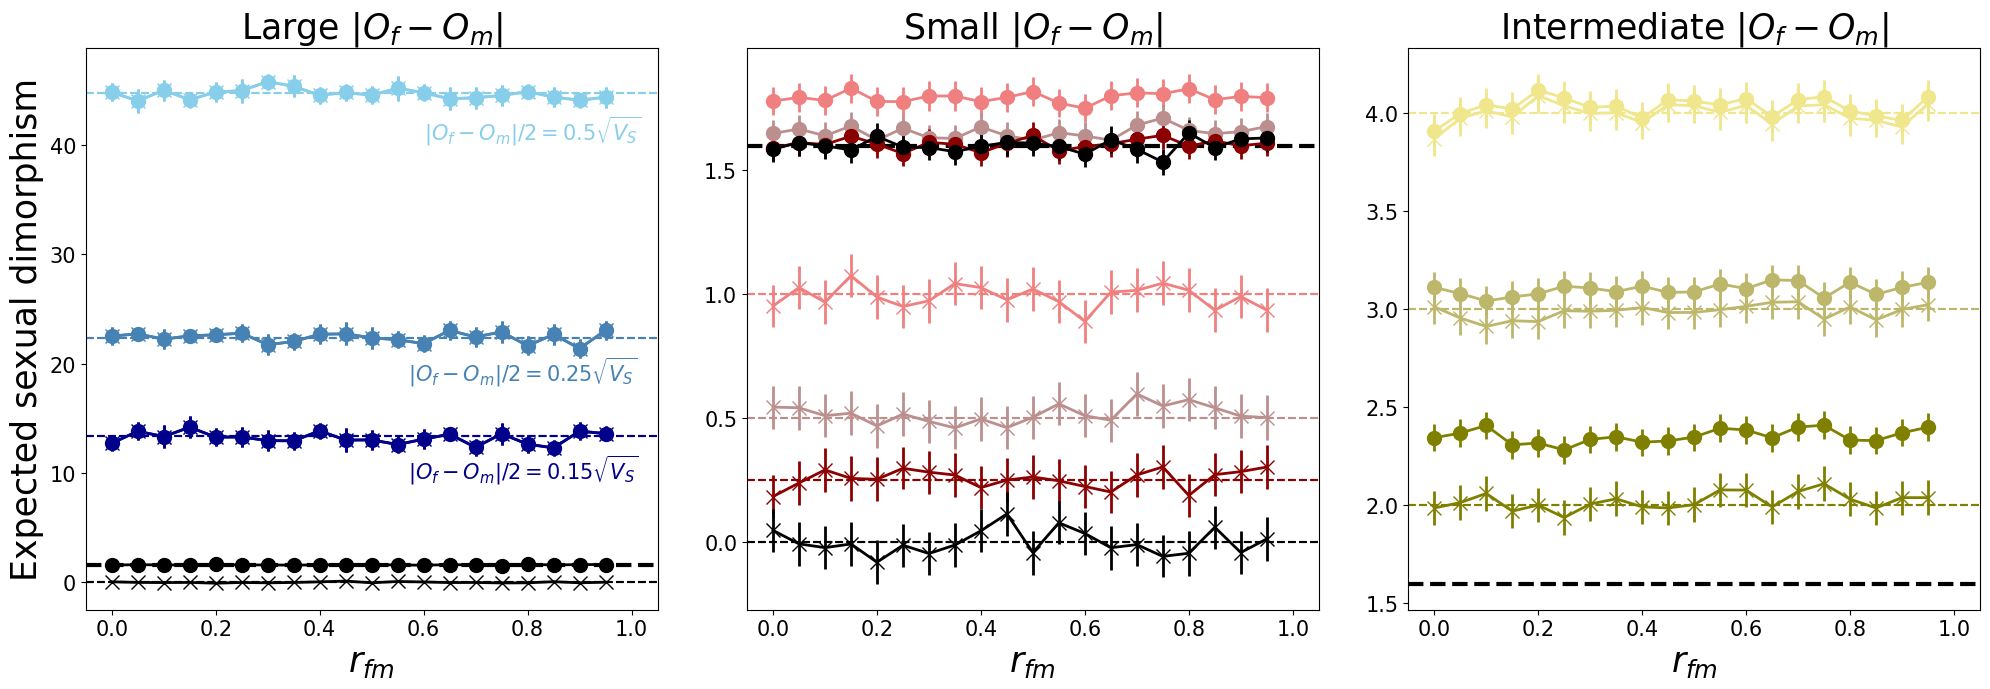

In [4]:
# Figure 1 A-C: approximately infinitesimal

f, ((ax1,ax2,ax3)) = plt.subplots(1,3, figsize=(20,7))

plot_figa ('l', 'ESD', ax1)
plot_figa ('m', 'ESD', ax1)
plot_figa ('s', 'ESD', ax1)
plot_figa (0, 'ESD', ax1, simtype='WFHW')
plot_figa ('l', 'EabsSD', ax1)
plot_figa ('m', 'EabsSD', ax1)
plot_figa ('s', 'EabsSD', ax1)
plot_figa (0, 'EabsSD', ax1, simtype='WFHW')

plot_figa (0.5, 'ESD', ax2, simtype='WFHW', removerfm1=1)
plot_figa (0.25, 'ESD', ax2, simtype='WFHW', removerfm1=1)
plot_figa (0.125, 'ESD', ax2, simtype='WFHW', removerfm1=1)
plot_figa (0, 'ESD', ax2, simtype='WFHW', removerfm1=1)
plot_figa (0.5, 'EabsSD', ax2, simtype='WFHW', removerfm1=1)
plot_figa (0.25, 'EabsSD', ax2, simtype='WFHW', removerfm1=1)
plot_figa (0.125, 'EabsSD', ax2, simtype='WFHW', removerfm1=1)
plot_figa (0, 'EabsSD', ax2, simtype='WFHW', removerfm1=1)

plot_figa (2, 'ESD', ax3, simtype='WFHW', removerfm1=1)
plot_figa (1.5, 'ESD', ax3, simtype='WFHW', removerfm1=1)
plot_figa (1, 'ESD', ax3, simtype='WFHW', removerfm1=1)
plot_figa (2, 'EabsSD', ax3, simtype='WFHW', removerfm1=1)
plot_figa (1.5, 'EabsSD', ax3, simtype='WFHW', removerfm1=1)
plot_figa (1, 'EabsSD', ax3, simtype='WFHW', removerfm1=1)

[[ax.axhline(y=2*np.sqrt(2/np.pi), c='black', ls='--', lw=3, label=r'$2\cdot\sqrt{2/\pi}$')] for ax in [ax1, ax2, ax3]]

ax1.set_ylabel('Expected sexual dimorphism', fontsize=25)
ax1.set_title(r'Large $|O_f-O_m|$', fontsize=25)
ax2.set_title(r'Small $|O_f-O_m|$', fontsize=25)
ax3.set_title(r'Intermediate $|O_f-O_m|$', fontsize=25)

ax1.text(0.57, 9.5, '$|O_f-O_m|/2 = 0.15\sqrt{V_S}$', color='darkblue', fontsize = 15)
ax1.text(0.57, 18.5, '$|O_f-O_m|/2 = 0.25\sqrt{V_S}$', color='steelblue', fontsize = 15)
ax1.text(0.6, 40.5, '$|O_f-O_m|/2 = 0.5\sqrt{V_S}$', color='skyblue', fontsize = 15)

#ax1.legend(ncol=2, fontsize=20, title=r'$|O_f-O_m|$ (in units of $\delta$)', title_fontsize=20, bbox_to_anchor=(-0.5, 1.7))

f.tight_layout()

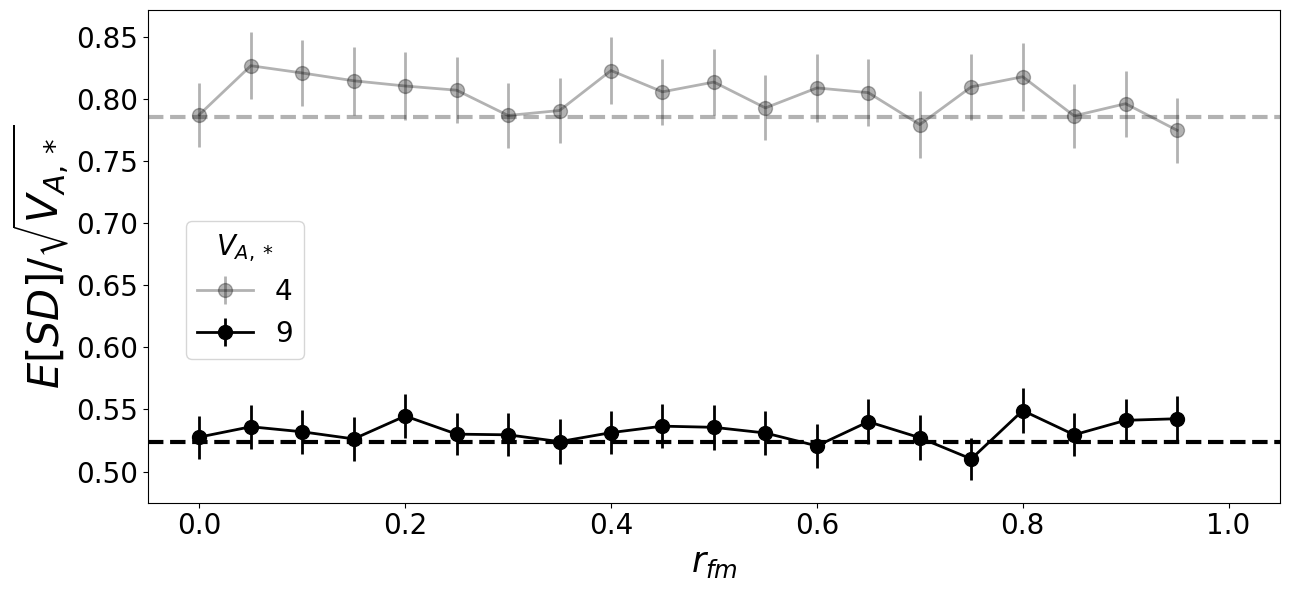

In [5]:
# Figure 1D
f, ax1 = plt.subplots(figsize=(13,6))

plot_fig1b ('EabsSD', 1, 4, ax1, simtype='WFHW', lab=4)
plot_fig1b ('EabsSD', 1, 9, ax1, simtype='WFHW', lab=9)
ax1.axhline(y=np.pi/(2*2), c='black', ls='dashed', lw=3, alpha=0.3)
ax1.axhline(y=np.pi/(2*3), c='black', ls='dashed', lw=3)

ax1.legend(fontsize=20, title=r'$V_{A,*}$', title_fontsize=20, bbox_to_anchor=(0.15, 0.6))

ax1.set_ylabel(r'$E[SD]/\sqrt{V_{A,*}}$', fontsize=30)#'\n(units 'r'$\delta^2$)')
ax1.set_xlabel(r'$r_{fm}$', fontsize=25)
f.tight_layout()

## Figure S3

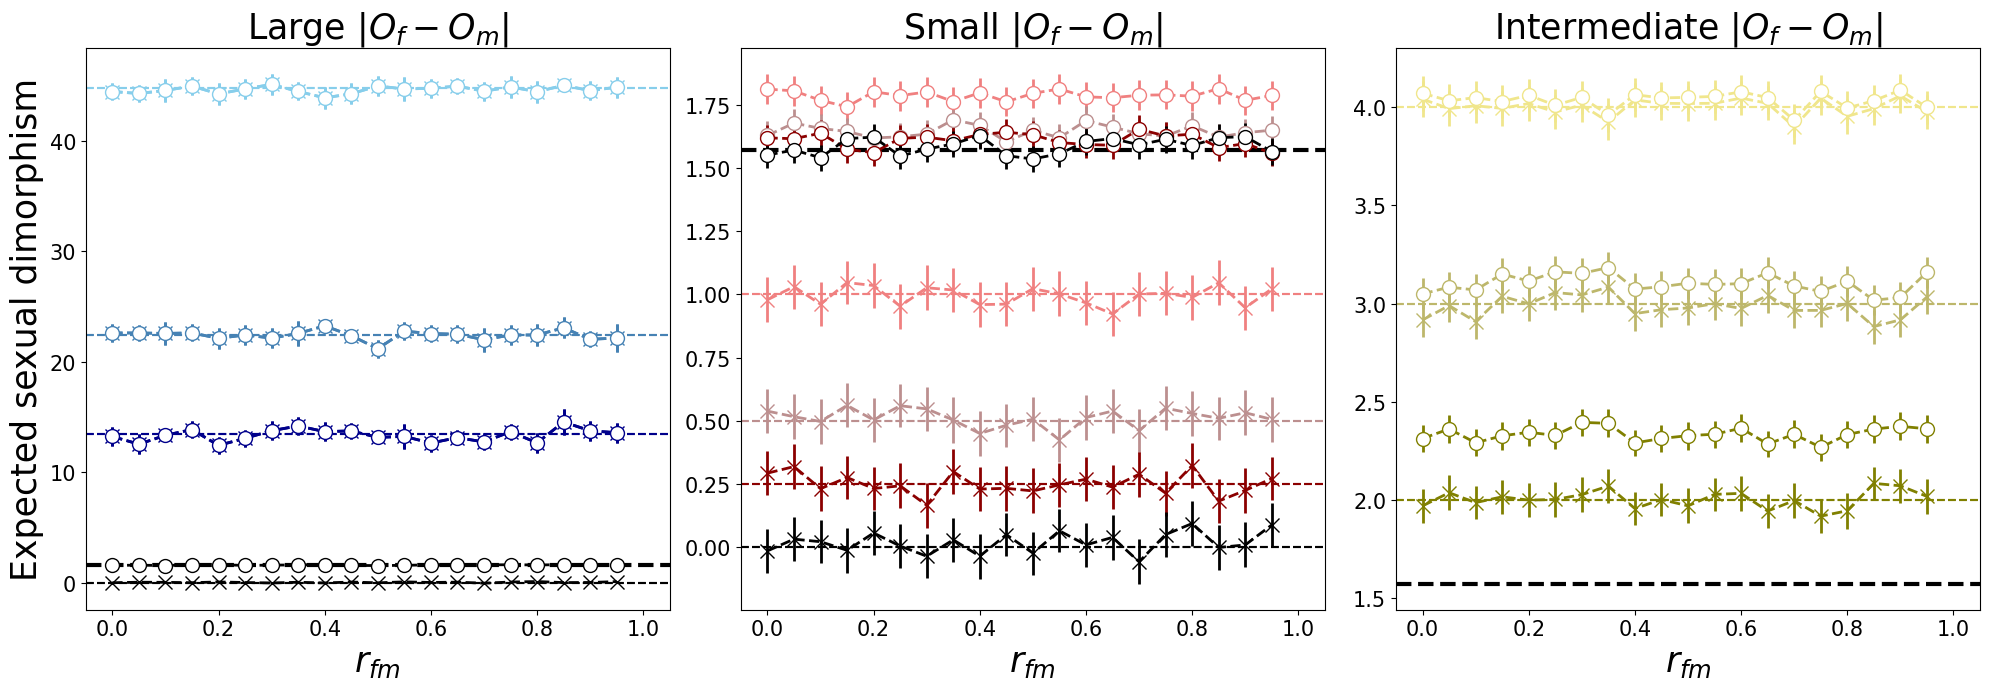

In [6]:
# Panels A-C: multigenic

f, ((ax1,ax2,ax3)) = plt.subplots(1,3, figsize=(20,7))

plot_figa ('l', 'ESD', ax1, E2Ns=16)
plot_figa ('m', 'ESD', ax1, E2Ns=16)
plot_figa ('s', 'ESD', ax1, E2Ns=16)
plot_figa (0, 'ESD', ax1, simtype='WFHW', E2Ns=16)
plot_figa ('l', 'EabsSD', ax1, E2Ns=16)
plot_figa ('m', 'EabsSD', ax1, E2Ns=16)
plot_figa ('s', 'EabsSD', ax1, E2Ns=16)
plot_figa (0, 'EabsSD', ax1, simtype='WFHW', E2Ns=16)

plot_figa (0.5, 'ESD', ax2, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (0.25, 'ESD', ax2, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (0.125, 'ESD', ax2, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (0, 'ESD', ax2, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (0.5, 'EabsSD', ax2, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (0.25, 'EabsSD', ax2, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (0.125, 'EabsSD', ax2, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (0, 'EabsSD', ax2, simtype='WFHW', removerfm1=1, E2Ns=16)

plot_figa (2, 'ESD', ax3, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (1.5, 'ESD', ax3, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (1, 'ESD', ax3, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (2, 'EabsSD', ax3, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (1.5, 'EabsSD', ax3, simtype='WFHW', removerfm1=1, E2Ns=16)
plot_figa (1, 'EabsSD', ax3, simtype='WFHW', removerfm1=1, E2Ns=16)

[[ax.axhline(y=np.pi/2, c='black', ls='--', lw=3, label=r'$\pi /2$')] for ax in [ax1, ax2, ax3]]

ax1.set_ylabel('Expected sexual dimorphism', fontsize=25)
ax1.set_title(r'Large $|O_f-O_m|$', fontsize=25)
ax2.set_title(r'Small $|O_f-O_m|$', fontsize=25)
ax3.set_title(r'Intermediate $|O_f-O_m|$', fontsize=25)

f.tight_layout()
#ax3.legend(ncol=2, fontsize=20, title=r'$|O_f-O_m|$', title_fontsize=20, bbox_to_anchor=(-0.5, 1.7))

In [7]:
#0.350, 0.500, 0.550, 0.600, 0.700, 0.850, 0.900, 0.950

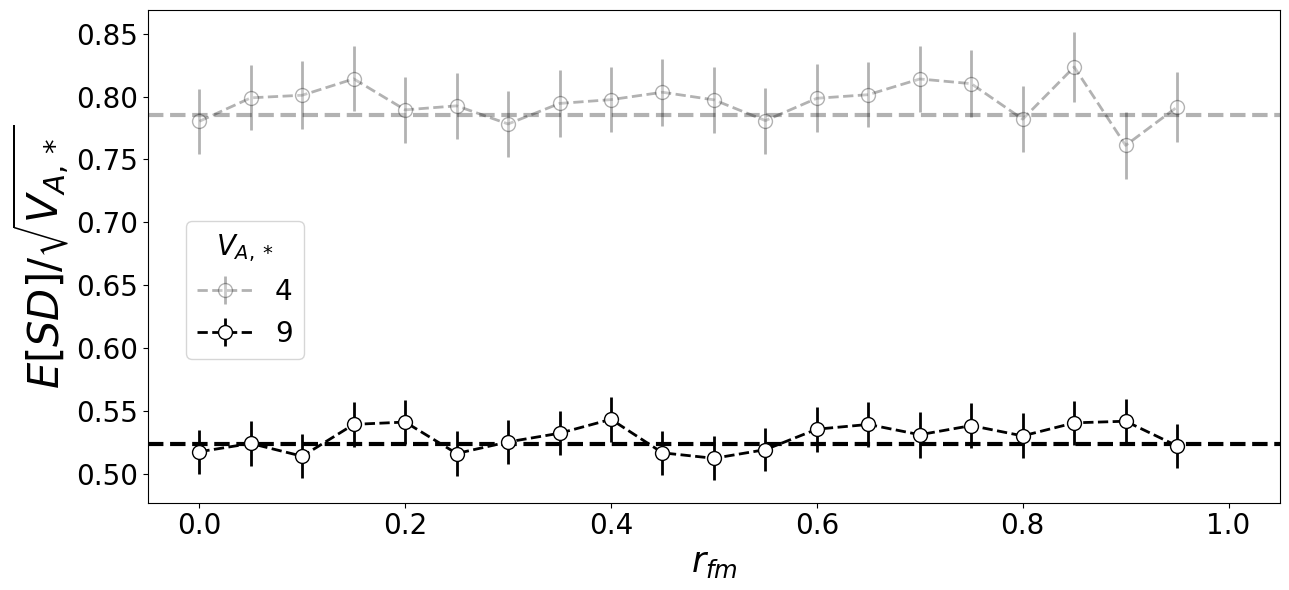

In [8]:
# Figure S3D
f, ax1 = plt.subplots(figsize=(13,6))

plot_fig1b ('EabsSD', 16, 4, ax1, simtype='WFHW', lab=4)
plot_fig1b ('EabsSD', 16, 9, ax1, simtype='WFHW', lab=9)
ax1.axhline(y=np.pi/(2*2), c='black', ls='dashed', lw=3, alpha=0.3)
ax1.axhline(y=np.pi/(2*3), c='black', ls='dashed', lw=3)

ax1.legend(fontsize=20, title=r'$V_{A,*}$', title_fontsize=20, bbox_to_anchor=(0.15, 0.6))

ax1.set_ylabel(r'$E[SD]/\sqrt{V_{A,*}}$', fontsize=30)#'\n(units 'r'$\delta^2$)')
ax1.set_xlabel(r'$r_{fm}$', fontsize=25)
f.tight_layout()

## Figure S4

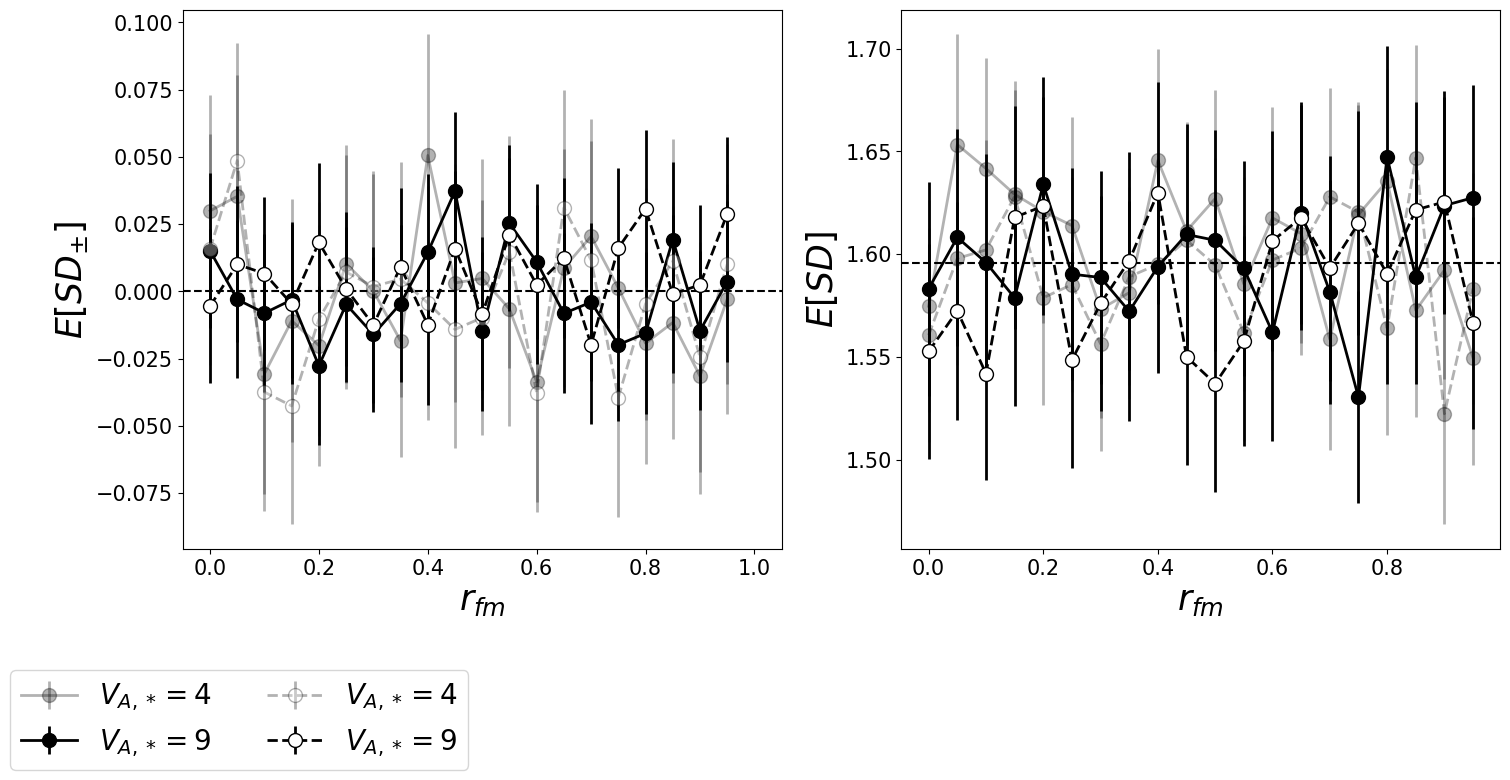

In [9]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(17,7))
plot_fig1b ('ESD', 1, 4, ax1, simtype='WFHW', lab='$V_{A,*}=4$')
plot_fig1b ('ESD', 1, 9, ax1, simtype='WFHW', lab='$V_{A,*}=9$')
plot_fig1b ('ESD', 16, 4, ax1, simtype='WFHW', lab='$V_{A,*}=4$')
plot_fig1b ('ESD', 16, 9, ax1, simtype='WFHW', lab='$V_{A,*}=9$')
plot_confint ('EabsSD', 4, 1, 0, 'rfm', ax2, 'black', 'solid', 'black', a=0.3, simtype='WFHW', fmt='o', removerfm1=0, label='4')
plot_confint ('EabsSD', 4, 16, 0, 'rfm', ax2, 'black', 'dashed', 'black', a=0.3, simtype='WFHW', fmt='o', removerfm1=0)
plot_confint ('EabsSD', 9, 1, 0, 'rfm', ax2, 'black', 'solid', 'black', simtype='WFHW', fmt='o', removerfm1=0, label='9')
plot_confint ('EabsSD', 9, 16, 0, 'rfm', ax2, 'black', 'dashed', 'white', simtype='WFHW', fmt='o', removerfm1=0)

ax1.axhline(y=0, c='black', ls='--')
ax1.set_ylabel(r'$E[SD_{\pm}]$', fontsize=25)
ax2.axhline(y=2*np.sqrt(2/np.pi), c='black', ls='--')
ax2.set_ylabel(r'$E[SD]$', fontsize=25)
ax2.set_xlabel(r'$r_{fm}$', fontsize=25)
[ax.tick_params(axis='both', labelsize=15) for ax in [ax1,ax2]]

ax1.legend(fontsize=20, ncol=2, title_fontsize=20, bbox_to_anchor=(0.5, -0.2))

## Figure S7

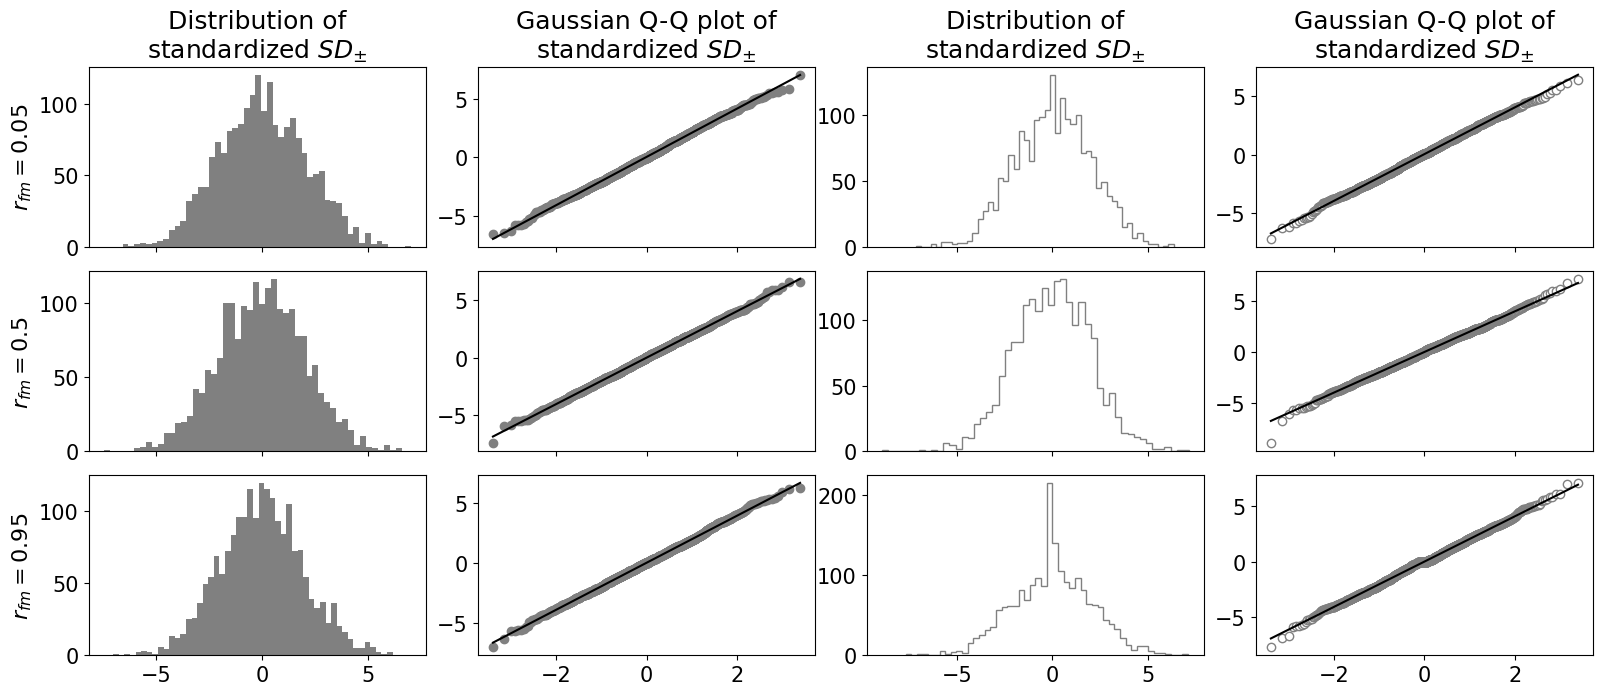

In [10]:
def plot_normality (VA, E2Ns, rfm, ax1,ax2, simtype):
    # get data
    data = load_data(VA, E2Ns, 0, rfm, simtype)
    SD = data.meanF-data.meanM
    stdSD = SD-np.mean(SD)/np.std(SD)
    #print(kstest(stdSD,'norm'))
    # plot
    if VA==4: col='grey' #col='darkkhaki'
    elif VA==9: col='black' #col='darkorchid'
    stats.probplot(stdSD, dist="norm", plot=ax2);
    if E2Ns==1: 
        ax1.hist(stdSD,50, color=col)
        ax2.get_lines()[0].set_markerfacecolor(col)
    elif E2Ns==16: 
        ax1.hist(stdSD,50, histtype='step', color=col, lw=2)
        ax2.get_lines()[0].set_markerfacecolor('white')
    ax2.get_lines()[0].set_markeredgecolor(col)
    ax2.get_lines()[1].set_color('black')
    ax2.set_title('')
    ax2.set_xlabel('')
    ax2.set_ylabel('')

def plot_normality_all (VA, simtype):
    f, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12)) = plt.subplots (3,4, figsize=(16,7), sharex='col')
    
    plot_normality (VA, 1, 0.05, ax1,ax2, simtype)
    plot_normality (VA, 1, 0.5, ax5,ax6, simtype)
    plot_normality (VA, 1, 0.95, ax9,ax10, simtype)
    plot_normality (VA, 16, 0.05, ax3,ax4, simtype)
    plot_normality (VA, 16, 0.5, ax7,ax8, simtype)
    plot_normality (VA, 16, 0.95, ax11,ax12, simtype)
    
    ax1.set_ylabel(r'$r_{fm}=0.05$', fontsize=16)
    ax5.set_ylabel(r'$r_{fm}=0.5$', fontsize=16)
    ax9.set_ylabel(r'$r_{fm}=0.95$', fontsize=16)
    [ax.set_title('Distribution of\n' r'standardized $SD_{\pm}$', fontsize=18) for ax in [ax1,ax3]]
    [ax.set_title('Gaussian Q-Q plot of\n' r'standardized $SD_{\pm}$', fontsize=18) for ax in [ax2,ax4]]
    f.tight_layout()
    [ax.tick_params(axis='both', labelsize=15) for ax in [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]] 

simtype='WFHW'
VA=4 #VA=9 # Change VA=4 or 9
plot_normality_all (VA, simtype)

## Figure S8

In [11]:
def get_var (var, VA, E2Ns, simtype=''):
    rfms = np.arange(0,1,0.05)
    #create empty df
    df = pd.DataFrame (columns=['q', 'rfm','S', 'minn', 'maxx'])
    # calculate estimate and CI for each rfm
    for rfm in rfms:
        data = load_data(VA, E2Ns, 0, rfm, simtype=simtype)
        # variance in the average phenotype (across sexes)
        if var=='mean': res = chi2_confint(0.5*(data.meanF+data.meanM))
        # variance in sexual dimorphism
        elif var=='SD': res = chi2_confint(data.meanF-data.meanM)
        else: res = chi2_confint (data[var])
        # append results to df
        l = [(1-rfm), rfm]+ list(res)
        df.loc[len(df)] = l
    df['SE_min'] = df.S-df.minn
    df['SE_max'] = df.maxx-df.S
    return df

def get_covar_i (a,b):
    Y = np.mean(a*b)
    SE = 1.96*np.std(a*b)/np.sqrt(len(a)) # this would be SEM
    return Y, SE
    
def get_covar (var, VA, E2Ns, simtype=''):
    rfms = np.arange(0,1,0.05)
    df = pd.DataFrame (columns=['q', 'rfm','Y','SE'])
    for rfm in rfms:
        data = load_data(VA, E2Ns, 0, rfm, simtype=simtype)
        if var=='mean': Y, SE = get_covar_i(data['meanF'], data['meanM'])
        # append results to df
        l = [(1-rfm), rfm, Y, SE]
        df.loc[len(df)] = l
    return df 

def get_covarbyvZ (which, VA, E2Ns, simtype=''):
    # get cov and Vz: means and SE
    cov = get_covar (which, VA, E2Ns, simtype=simtype)
    Vz = get_var (which, VA, E2Ns, simtype=simtype)
    # get cov/Vz
    Y = cov.Y/Vz.S
    # get SE (according to https://www.researchgate.net/post/How-to-calculate-error-of-a-ratio-of-two-data-with-errors)
    SE_min = np.sqrt((cov.SE/cov.Y)**2 + (Vz.SE_min/Vz.S)**2) * abs(Y)
    SE_max = np.sqrt((cov.SE/cov.Y)**2 + (Vz.SE_max/Vz.S)**2) * abs(Y)
    return pd.DataFrame ({'q':cov.q, 'rfm':cov.rfm, 'Y':Y, 'SE_min':SE_min, 'SE_max':SE_max})
    
def plot_var (var, VA, E2Ns, rfm_q, ax, col='black', ls='solid', a=1, simtype=''):
    df = get_var (var, VA, E2Ns, simtype=simtype)
    col, ls, m, a = get_aesthetics (VA, E2Ns)
    fmt='o'
    if var=='meanM': fmt = '^'
    ax.errorbar(df[rfm_q], df.S, yerr = [df.SE_min,df.SE_max], fmt=fmt, c=col, ls=ls, alpha=a, mfc=m, markersize=8, lw=2)


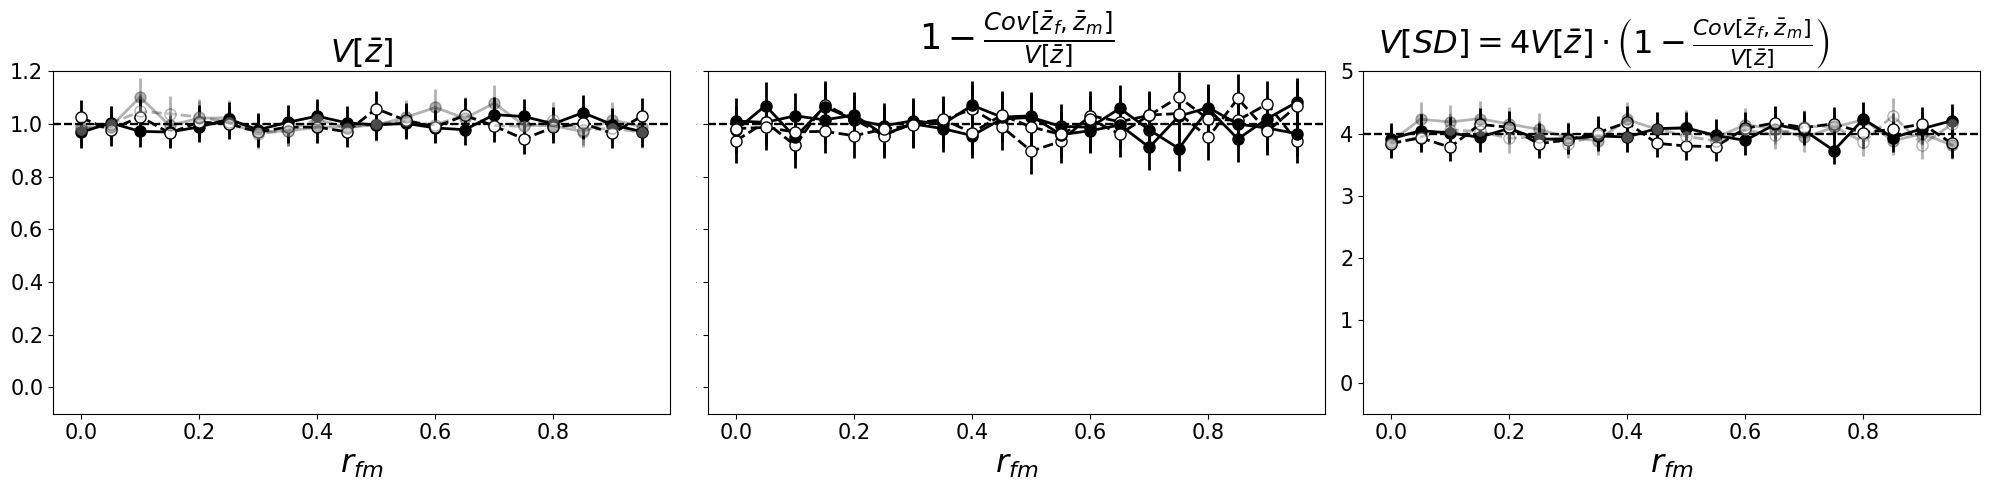

In [12]:
f, (ax1,ax2,ax3) = plt.subplots (1,3, figsize=(20,5), sharex=True, sharey='col')

def plot_fig2 (VA, E2Ns, ax1, ax2, ax3, simtype=''):
    plot_var ('mean', VA, E2Ns, 'rfm', ax1, simtype=simtype) 
    df = get_covarbyvZ ('mean', VA, E2Ns, simtype=simtype)
    col, ls, m, a = get_aesthetics (VA, E2Ns)
    ax2.errorbar(df.rfm, 1-df.Y, yerr = [df.SE_min,df.SE_max], fmt='o', c=col, ls=ls, mfc=m, markersize=8, lw=2)
    plot_var ('SD', VA, E2Ns, 'rfm', ax3, simtype=simtype) 
    
    [ax.axhline(y=1, c='black', ls='--') for ax in [ax1,ax2]]
    ax3.axhline(y=4, c='black', ls='--')
    
    [ax.set_ylim(-0.1,1.2) for ax in [ax1,ax2]] 
    [ax.tick_params(axis='both', labelsize=15) for ax in [ax1,ax2,ax3]] 
    ax2.tick_params(axis='y', labelsize=0)

plot_fig2 (9, 1, ax1,ax2,ax3, simtype='WFHW')
plot_fig2 (9, 16, ax1,ax2,ax3, simtype='WFHW')
plot_fig2 (4, 1, ax1,ax2,ax3, simtype='WFHW')
plot_fig2 (4, 16, ax1,ax2,ax3, simtype='WFHW')

ax1.set_title(r'$V [\bar z]$', fontsize=23)#'\n(units 'r'$\delta^2$)')
ax2.set_title(r'$1-\frac{Cov [\bar z_f, \bar z_m]}{V[\bar z]}$', fontsize=25)
ax3.set_title(r'$V [SD] = 4 V[\bar z] \cdot \left( 1- \frac{Cov[\bar z_f,\bar z_m]}{V[\bar z]}\right)$              ', fontsize=23)#    (units $\delta^2$)', fontsize=20)   #(units 'r'$\delta^2$)')

[ax.set_xlabel(r'$r_{fm}$', fontsize=23) for ax in [ax1,ax2,ax3]]

ax3.set_ylim(-0.5,5)

f.tight_layout()

## Figure S5

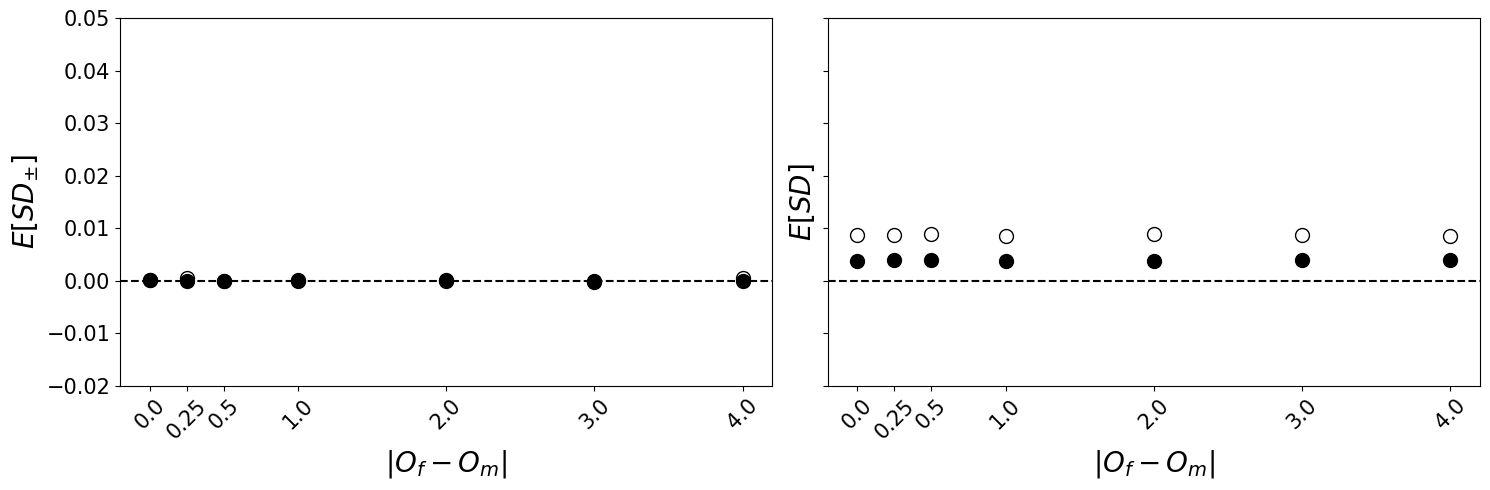

In [13]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True)

ois = [0, 0.125, 0.25, 0.5, 1, 1.5, 2]
xs = range(7)
mfc16 = ['white']*7
mfc1 = ['black']*7

for i in range(7):
    plot_confint ('ESD', 9, 16, ois[i], 'rfm', ax1, 'black', 'solid', mfc16[i], label=0, simtype='WFHW', fmt='o', removerfm1=0, rfms=[1], xs=[ois[i]*2])
    plot_confint ('EabsSD', 9, 16, ois[i], 'rfm', ax2, 'black', 'solid', mfc16[i], label=0, simtype='WFHW', fmt='o', removerfm1=0, rfms=[1], xs=[ois[i]*2])
    plot_confint ('ESD', 9, 1, ois[i], 'rfm', ax1, 'black', 'solid', mfc1[i], label=0, simtype='WFHW', fmt='o', removerfm1=0, rfms=[1], xs=[ois[i]*2])
    plot_confint ('EabsSD', 9, 1, ois[i], 'rfm', ax2, 'black', 'solid', mfc1[i], label=0, simtype='WFHW', fmt='o', removerfm1=0, rfms=[1], xs=[ois[i]*2])


[ax.axhline(y=0, c='black', ls='--') for ax in [ax1,ax2]]
[ax.set_xticks(np.array(ois)*2, np.array(ois)*2, rotation=45) for ax in [ax1,ax2]]
[ax.tick_params(axis='both', labelsize=15) for ax in [ax1,ax2]]
[ax.set_xlabel(r'$|O_f-O_m|$', fontsize=20) for ax in [ax1,ax2]]
ax1.set_ylabel('$E[SD_{\pm}]$', fontsize=20)
ax2.set_ylabel('$E[SD]$', fontsize=20)

#[ax.set_xticks(range(7), np.array(ois)*2) for ax in [ax1,ax2]]
[ax.set_xlabel(r'$|O_f-O_m|$', fontsize=20) for ax in [ax1,ax2]]
ax1.set_ylim(-0.02,0.05)
f.tight_layout()

## Figure S6

In [14]:
def readfile_fluctuations (E2Ns, rfm):
    #d = '/nfs/scistore18/bartogrp/gpuixeus/THEORY/IBS/CLUSTER/ANA1_24_100N/RESULTS_ANA6/'
    d = 'RESULTS_FIG1/FIGURE_S6/'
    Ngen=500; VA=9; oi=0; simtype='WFHW'; v='v1'
    if rfm>0.95: Ngen=1000; v='v4'
    file = pd.read_csv(d+'simtypes_1000N_%iNgen_%iVA_%iE2Ns_1reps_%.3frfm_%.3foF_%.3foM_%s_%s.csv'%(Ngen, VA, E2Ns, rfm, oi, -oi, simtype, v))
    return file

def get_col (rfm):
    if rfm==0: c = 'tab:grey'
    elif rfm==0.5: c = 'tab:orange'
    elif rfm==0.95: c = 'darkblue'
    return c
    
def plot_zfzm (E2Ns, rfm, ax):
    r = readfile_fluctuations (E2Ns, rfm)
    ax.plot(r.meanF, c='darkgreen', label=r'$\bar z_f$', lw=2)
    ax.plot(r.meanM, c='darkred', label=r'$\bar z_m$', lw=2)

def plot_sd (E2Ns, rfm, abssigned, ax):
    r = readfile_fluctuations (E2Ns, rfm)
    c='grey'
    if abssigned=='signed': ax.plot(r.meanF-r.meanM, c=c, lw=2, label=r'$SD_{\pm}$') #label=rfm
    elif abssigned=='abs': ax.plot(abs(r.meanF-r.meanM), c=c, lw=2, label=r'$SD$') #label=rfm

def plot_sd_all (E2Ns, abssigned, ax):
    plot_sd (E2Ns, 0, abssigned, ax)
    plot_sd (E2Ns, 0.5, abssigned, ax)
    plot_sd (E2Ns, 0.95, abssigned, ax)

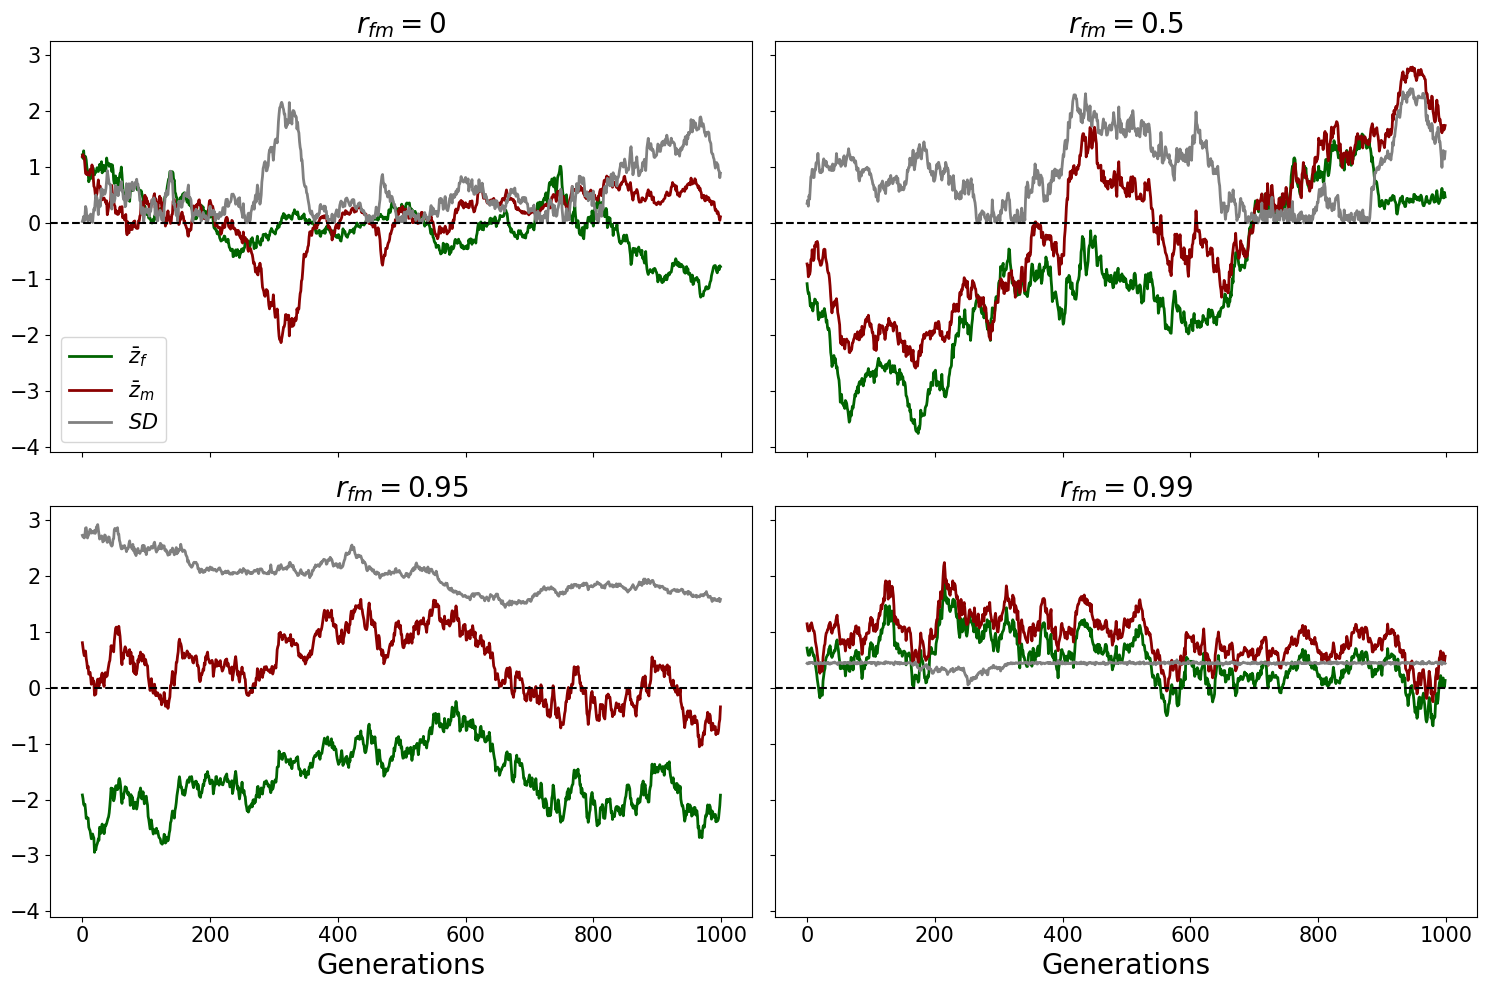

In [15]:
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,10), sharey=True, sharex=True)

E2Ns=16
abssigned='abs'
plot_zfzm(E2Ns, 0, ax1)
plot_zfzm(E2Ns, 0.5, ax2)
plot_zfzm(E2Ns, 0.95, ax3)
plot_zfzm(E2Ns, 0.99, ax4)
plot_sd (E2Ns, 0, abssigned, ax1)
plot_sd (E2Ns, 0.5, abssigned, ax2)
plot_sd (E2Ns, 0.95, abssigned, ax3)
plot_sd (E2Ns, 0.99, abssigned, ax4)

ax1.legend(fontsize=15, title_fontsize=20)
[ax.set_xlabel('Generations', fontsize=20) for ax in [ax3,ax4]];
ax1.set_title(r'$r_{fm}=0$', fontsize=20)
ax2.set_title(r'$r_{fm}=0.5$', fontsize=20)
ax3.set_title(r'$r_{fm}=0.95$', fontsize=20)
ax4.set_title(r'$r_{fm}=0.99$', fontsize=20)
#ax1.set_ylabel(r'$\bar z_f, \bar z_m$', fontsize=20)
[ax.tick_params(axis='both', labelsize=15) for ax in [ax1,ax2,ax3,ax4]]
[ax.axhline(y=0, c='black', ls='--') for ax in [ax1,ax2,ax3,ax4]]
f.tight_layout()